In [2]:
from google.colab import files
data_to_load = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")
velocity_list = df["Velocity"].tolist()
escaped_list = df["Escaped"].tolist()
fig = px.scatter(x = velocity_list,y = escaped_list)
fig.show()

In [4]:
import numpy as np
velocity_array = np.array(velocity_list)
escaped_array = np.array(escaped_list)
m,c = np.polyfit(velocity_array,escaped_array,1)
y = []
for x in velocity_array:
  y_value = m*x+c
  y.append(y_value)
fig = px.scatter(x = velocity_array,y = escaped_array)
fig.update_layout(shapes = [dict(type = 'line',y0 = min(y),y1 = max(y),x0 = min(velocity_array),x1 = max(escaped_array))])
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



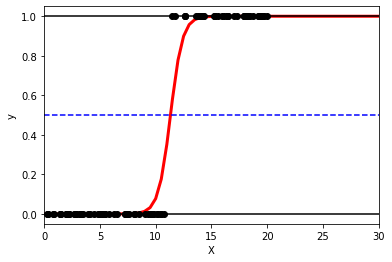

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = np.reshape(velocity_list,(len(velocity_list),1))
Y = np.reshape(escaped_list,(len(escaped_list),1))
lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color = 'black',zorder = 20)
def model(x):
  return 1/(1+np.exp(-x))
X_test = np.linspace(0,5000,10000)
melting_chances = model(X_test*lr.coef_ + lr.intercept_).ravel()
plt.plot(X_test,melting_chances,color = 'red',linewidth = 3)
plt.axhline(y = 0,color = 'k',linestyle = '-')
plt.axhline(y = 1,color = 'k',linestyle = '-')
plt.axhline(y = 0.5,color = 'b',linestyle = '--')
plt.axvline(x = X_test[6843],color = 'b',linestyle = '--')
plt.ylabel("y")
plt.xlabel("X")
plt.xlim(0,30)
plt.show()

In [ ]:
temp = float(input("enter the velocity"))
melting_chances = model(X_test*lr.coef_ + lr.intercept_).ravel()[0]
if melting_chances <=0.01:
  print("might escape")
elif melting_chances>=1:
  print("will escape")
elif melting_chances<0.5:
  print("might not escape")
else :
  print("might escape")